*__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 28, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 31: Window functions</font></center>

## <font color=#46769B>Introduction</font>

Suppose we have made some measurements of a function $f(t)$, sampling it at constant intervals $h$ to generate $N$ samples $f_n$. Now, we want to analyze it by taking the Discrete Fourier Transform (DFT) to see what kinds of periodic signals it has. Thus far, we have been careful to consider data samples that cover exactly an integer number of periods. However, generally, we don't know ahead of time the period of the signal we are trying to extract. There is no guarantee that the our measurements span exactly an integer number of periods.

It turns out that if you calculate the Fourier coefficients $c_k$ for samples covering a *non-integer* number of periods, you encounter a phenomenon known as __spectral leakage__. This means that Fourier coefficients that are supposed to be zero can be nonzero because power is "leaking" from one value of $k$ to another. 

The tool to minimize spectral leakage is known as a __window function__. Here is the main idea. First, let's recap DFT.
We have $N$ samples, denoted $f_n$, corresponding to samples of our function $f(t)$:

$$f_n = f(t_n) \, .$$

We compute the Fourier coefficients $c_k$ using the DFT:

$$c_k = \frac{1}{N} \sum_{n=0}^N f_n \, e^{-2\pi i k n/N}$$

Now, the main idea of a window function is that we should multiply our function $f(t)$ by a window function $w(t)$ before we take the DFT. Think of a window function as an envelope that modulates the amplitude of our function any way we like. For example, we can choose $w(t)$ to smoothly turn on and off at the edges of our interval. In this way, the edges (and whether they span exactly an integer number of periods) become less important and spectral leakage is minimized.

Here is some code that illustrates the idea of the window function:
- $f(t)$ is the actual function being sampled.
- $w(t)$ is a window function, which is something we can choose.
- The product $w(t) f(t)$ is the quantity for which we calculate the Fourier coefficients $c_k$ using DFT.

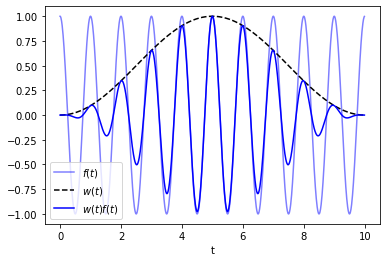

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,10,0.01)

# Example of a periodic function
f = np.cos(2*np.pi*t)

# Example of a window function
w = np.sin(np.pi*t/10)**2

# Plots
plt.plot(t,f,'b',label=r'$f(t)$',alpha=0.5)
plt.plot(t,w,'k--',label=r'$w(t)$')
plt.plot(t,w*f,'b',label=r'$w(t)f(t)$')

plt.legend()
plt.xlabel('t')
plt.show()

Including a window function, the formula for the Fourier coefficients is modified to be

$$c_k = \frac{1}{N} \sum_{n=0}^N w_n \, f_n \, e^{-2\pi i k n/N} \qquad (1)$$

where $w_n$ are samples of our window function

$$w_n = w(t_n) \, .$$

In practice, there is no need to specify what $w(t)$ is. We only need to know $w_n$ and in fact we will call $w_n$ itself *the window function*. Here we will consider a few options:
- *Rectangular window function* (also known as a *box*, *boxcar*, *top-hat*, etc.): This is the case of a uniform window function $w(t) = 1$ over the full time interval considered. (For the purposes of this exercise, this is the same thing as having *no* window function.)


- *Hann window function* (also known as *Hanning*): The window function is
$$w_n = \sin^2\left(\frac{\pi n}{N-1}\right) \, , \quad {\rm where} \; n = 0, 1, ..., N-1. \qquad (2) $$

There are many different types of window functions ([Wikipedia](https://en.wikipedia.org/wiki/Window_function) has a long list). There is no one-size-fits-all, but the Hann function is regarded as a reasonably good choice for many situations and is commonly used.

The goals of this exercise are:
- Continue introduction to concepts in signal processing

Required reading:
- *Lesson 13: Discrete Fourier Transform*




## <font color=#46769B>Exercise: Part (a)</font>

Consider a sinusoidal wave

$$f(t) = \cos(2\pi t)$$

Note the period of this wave is $T=1$ and the frequency is $\nu = 1/T = 1$.
The goal here is to visualize what spectral leakage looks like for this simple example. 

First, we have a case where there is *no* spectral leakage since we consider an integer number of periods (note the period of $f(t)$ is $T=1$). Perform the following tasks:
- Generate $N = 1000$ samples $f_n$ over time interval $[0,20]$. Calculate the Fourier coefficients $c_k$ and the corresponding frequencies $\nu_k$. (Calculate the Fourier coefficients as normal, with *no* window function.)
- Plot the *power spectrum* by plotting $|c_k|^2$ as a function of $\nu_k$. For your plot, take the range along the $x$-axis to be $[0,6]$ and make the $y$-axis a log scale.

Second, we have a case where there *is* spectral leakage due to a noninteger number of periods. Generate $N=1000$ samples for $f(t)$ in the range $[0,20.5]$ and perform again the same tasks as above.


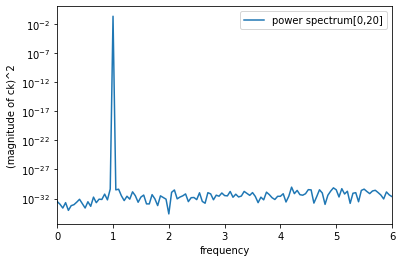

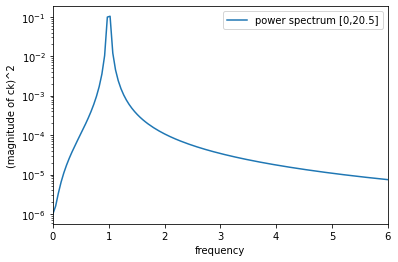

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

N = 1000
h = 20/N

tn = np.arange(0,20,h)

fn = np.cos(2*np.pi*tn)

ck = np.zeros(N,dtype = 'complex')

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N)) 


frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='power spectrum[0,20]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()

#interval [0,20.5]
h = 20.5/N
tn = np.arange(0,20.5,h)
fn = np.cos(2*np.pi*tn)

ck = np.zeros(N,dtype = 'complex')

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N)) 


frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='power spectrum [0,20.5]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()

## <font color=#46769B>Exercise: Part (b)</font>

Next, we will consider a __Hann window function__. Perform the following tasks: 
- Repeat *all* the steps of Problem (1), for both $[0,20]$ and $[0,20.5]$ time intervals. 
- In this part, you will calculate the Fourier coefficients $c_k$ following Eq. (1), where the window function $w_n$ is given in Eq. (2).
- Make a final power spectrum plot that shows your results from both Parts (a) and (b) *on the same plot*, plotting $|c_k|^2$ as a function of $\nu_k$ for the case where you sampled over a time interval $[0,20.5]$. (Be sure to plot each one in different colors.)

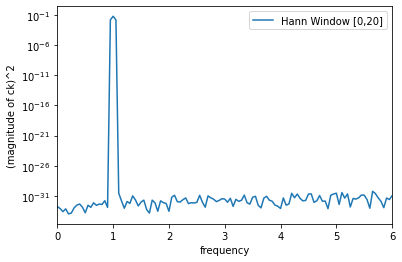

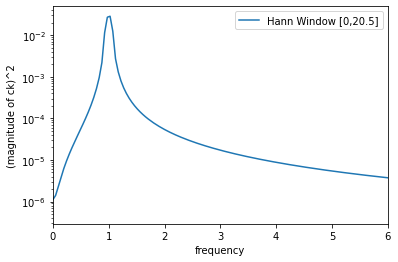

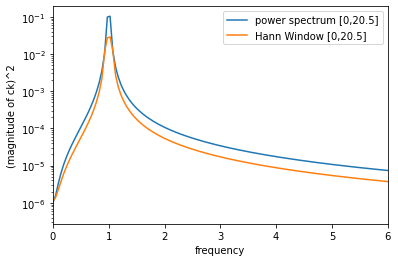

In [5]:
#range [0,20]

N = 1000
h = 20/N
tn = np.arange(0,20,h)

fn = np.cos(2*np.pi*tn)

n = np.array(range(N))

wn = (np.sin(np.pi*n/N-1))**2 

ck = np.zeros(N,dtype='complex')

for k in range(N):
  ck[k] = (1/N)*np.sum(wn*fn*np.exp(-2j*np.pi*k*n/N))

frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='Hann Window [0,20]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()

#for interval [0,20.5]
h = 20.5/N
tn = np.arange(0,20.5,h)

fn = np.cos(2*np.pi*tn)

n = np.array(range(N))

wn = (np.sin(np.pi*n/N-1))**2 

ck = np.zeros(N,dtype='complex')

for k in range(N):
  ck[k] = (1/N)*np.sum(wn*fn*np.exp(-2j*np.pi*k*n/N))

frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='Hann Window [0,20.5]')
plt.yscale('log')
plt.xlim(0,6)
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.legend()
plt.show()

# power spectrum that shows part a) and b) on interval [0,20.5]
h = 20.5/N
tn = np.arange(0,20.5,h)
fn = np.cos(2*np.pi*tn)

ck = np.zeros(N,dtype = 'complex')

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N)) 


frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='power spectrum [0,20.5]')
plt.yscale('log')
plt.xlim(0,6)
plt.legend()

h = 20.5/N
tn = np.arange(0,20.5,h)

fn = np.cos(2*np.pi*tn)

n = np.array(range(N))

wn = (np.sin(np.pi*n/N-1))**2 

ck = np.zeros(N,dtype='complex')

for k in range(N):
  ck[k] = (1/N)*np.sum(wn*fn*np.exp(-2j*np.pi*k*n/N))

frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='Hann Window [0,20.5]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()


## <font color=#46769B>Exercise: Part (c)</font>

Here you are to perform a similar analysis as in Parts (a) and (b), but for a square wave with period $T=1$:

$$f(t) = \left\{ \begin{array}{cc} 1 & {\rm for} \; 0 \le  t < \tfrac{1}{2} \\ 0 & {\rm for} \; \tfrac{1}{2} \le t < 1 \end{array} \right. .$$

Your tasks are:
- Take $N = 1000$ samples for the time interval $[0,20]$. Take the DFT (with no window function) and plot the power spectrum as a function of frequency, for $\nu_k$ in the range $[0,6]$. This part is just to see that the Fourier coefficients are nonzero for $\nu_k = 1$, $3$, $5$, etc.
- Take $N = 1000$ samples for the time interval $[0,20.5]$. Take the DFT and plot the power spectrum as a function of frequency, for $\nu_k$ in the range $[0,6]$, both *with* and *without* a Hann window function. Plot the two power spectra on the same plot and use a log scale for the $y$-axis.

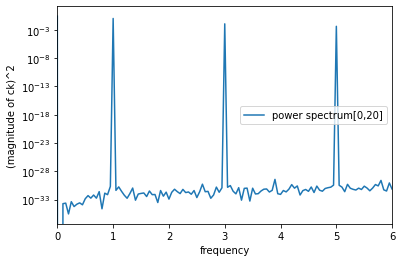

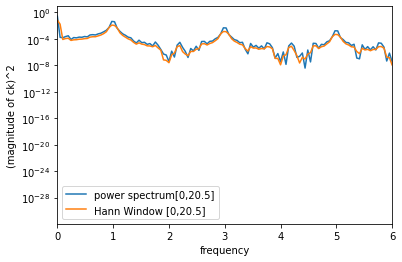

In [6]:
# Code for square wave

def square_wave(t):
    if (t >= 0) & (t < 1/2):
        return 1
    elif (t >= 1/2) & (t < 1):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+1)
    else:
        # Shift t down by one period
        return square_wave(t-1)

f = np.vectorize(square_wave)

T = 1 

#interval [0,20] with no window function
h = 20/N
tn = np.arange(0,20,h)

fn = f(tn)

ck = np.zeros(N,dtype = 'complex')

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N)) 


frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='power spectrum[0,20]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()

#interval [0,20.5]

#no hann window
h = 20.5/N
tn = np.arange(0,20.5,h)

fn = f(tn)

ck = np.zeros(N,dtype = 'complex')

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*k*n/N)) 


frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5


magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='power spectrum[0,20.5]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()

#Hann window
fn = f(tn)
ck = np.zeros(N,dtype = 'complex')

n = np.array(range(N))

wn = (np.sin(np.pi*n/N-1))**2 

for k in range(N):
  ck[k] = (1/N)*np.sum(wn*fn*np.exp(-2j*np.pi*k*n/N))

frequency = np.zeros(N)
#calculate frequencies 
for k in range(N):
  frequency[k] = k/20.5

magnitudes_ck = np.abs(ck)

plt.plot(frequency,magnitudes_ck**2,label='Hann Window [0,20.5]')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('(magnitude of ck)^2')
plt.xlim(0,6)
plt.legend()
plt.show()